#Battery Remaining Useful Life (RUL)
Predict the RUL of batteries by features based on voltage and current.

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

Variables:

- Cycle Index: number of cycle
- F1: Discharge Time (s)
- F2: Time at 4.15V (s)
- F3: Time Constant Current (s)
- F4: Decrement 3.6-3.4V (s)
- F5: Max. Voltage Discharge (V)
- F6: Min. Voltage Charge (V)
- F7: Charging Time (s)
- Total time (s)
- RUL: target
You may check dataset from kaggle: https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
import time

# Let's start data exploration!

In [5]:
df = pd.read_csv("/content/drive/MyDrive/BatteryLifeDataset/Battery_RUL.csv")
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [7]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


# Explatory Data Analysis (EDA)

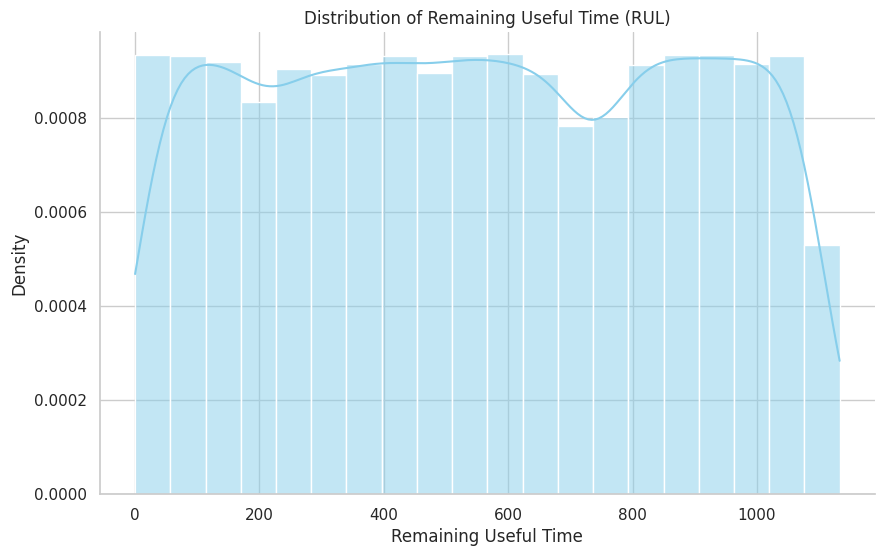

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df.RUL, kde=True, color="skyblue", stat="density", bins=20)
plt.title('Distribution of Remaining Useful Time (RUL)')
plt.xlabel('Remaining Useful Time')
plt.ylabel('Density')

sns.despine()
plt.show()


In [10]:
corrmat = df.corr()
corrmat

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


We will plot the heatmap of correlation between variables

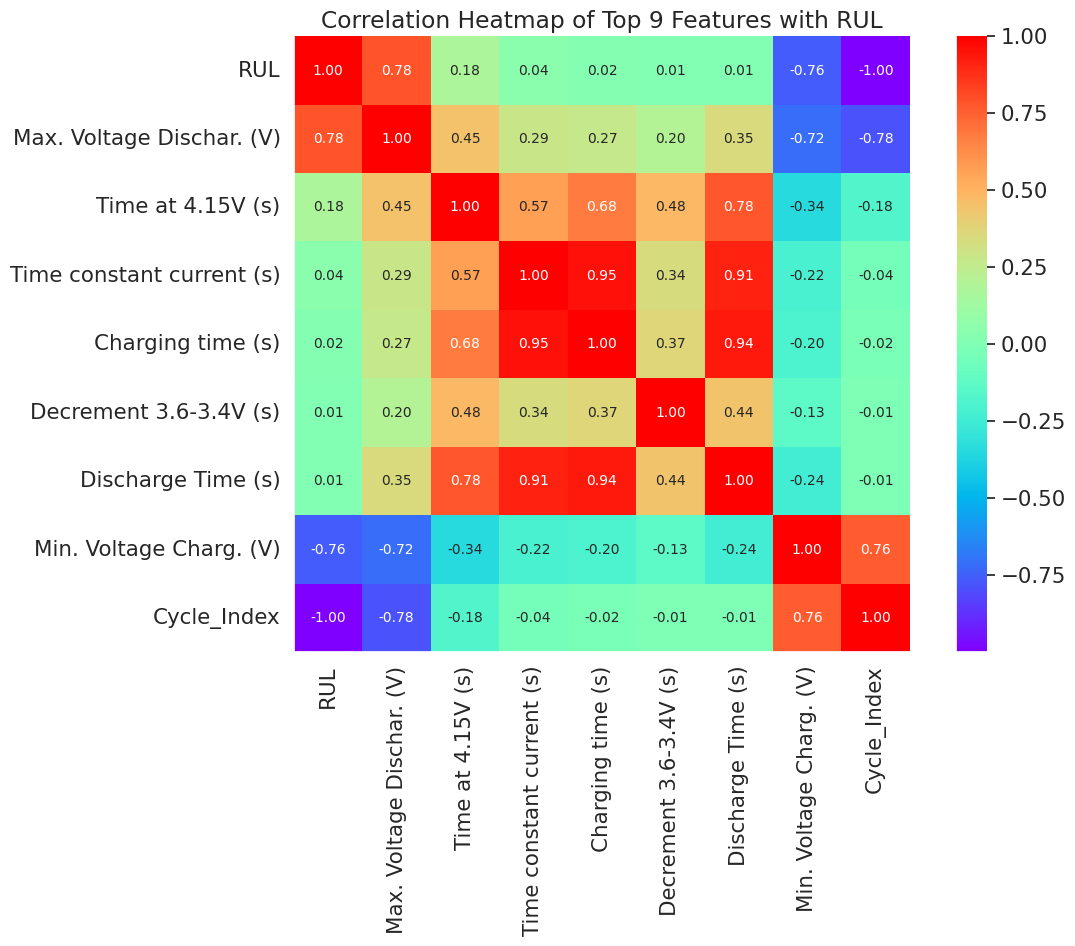

In [11]:
plt.figure(figsize=(12, 8))

k = 9
cols = corrmat.nlargest(k, 'RUL')['RUL'].index
cm = np.corrcoef(df[cols].values.T)

# appealing color palette
cmap = sns.color_palette("rainbow", as_cmap=True)

sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, cmap=cmap)
plt.title('Correlation Heatmap of Top {} Features with RUL'.format(k))
sns.despine()
plt.show()



The pair plot above provides a visual exploration of the relationships between selected features and the Remaining Useful Life (RUL) of the system

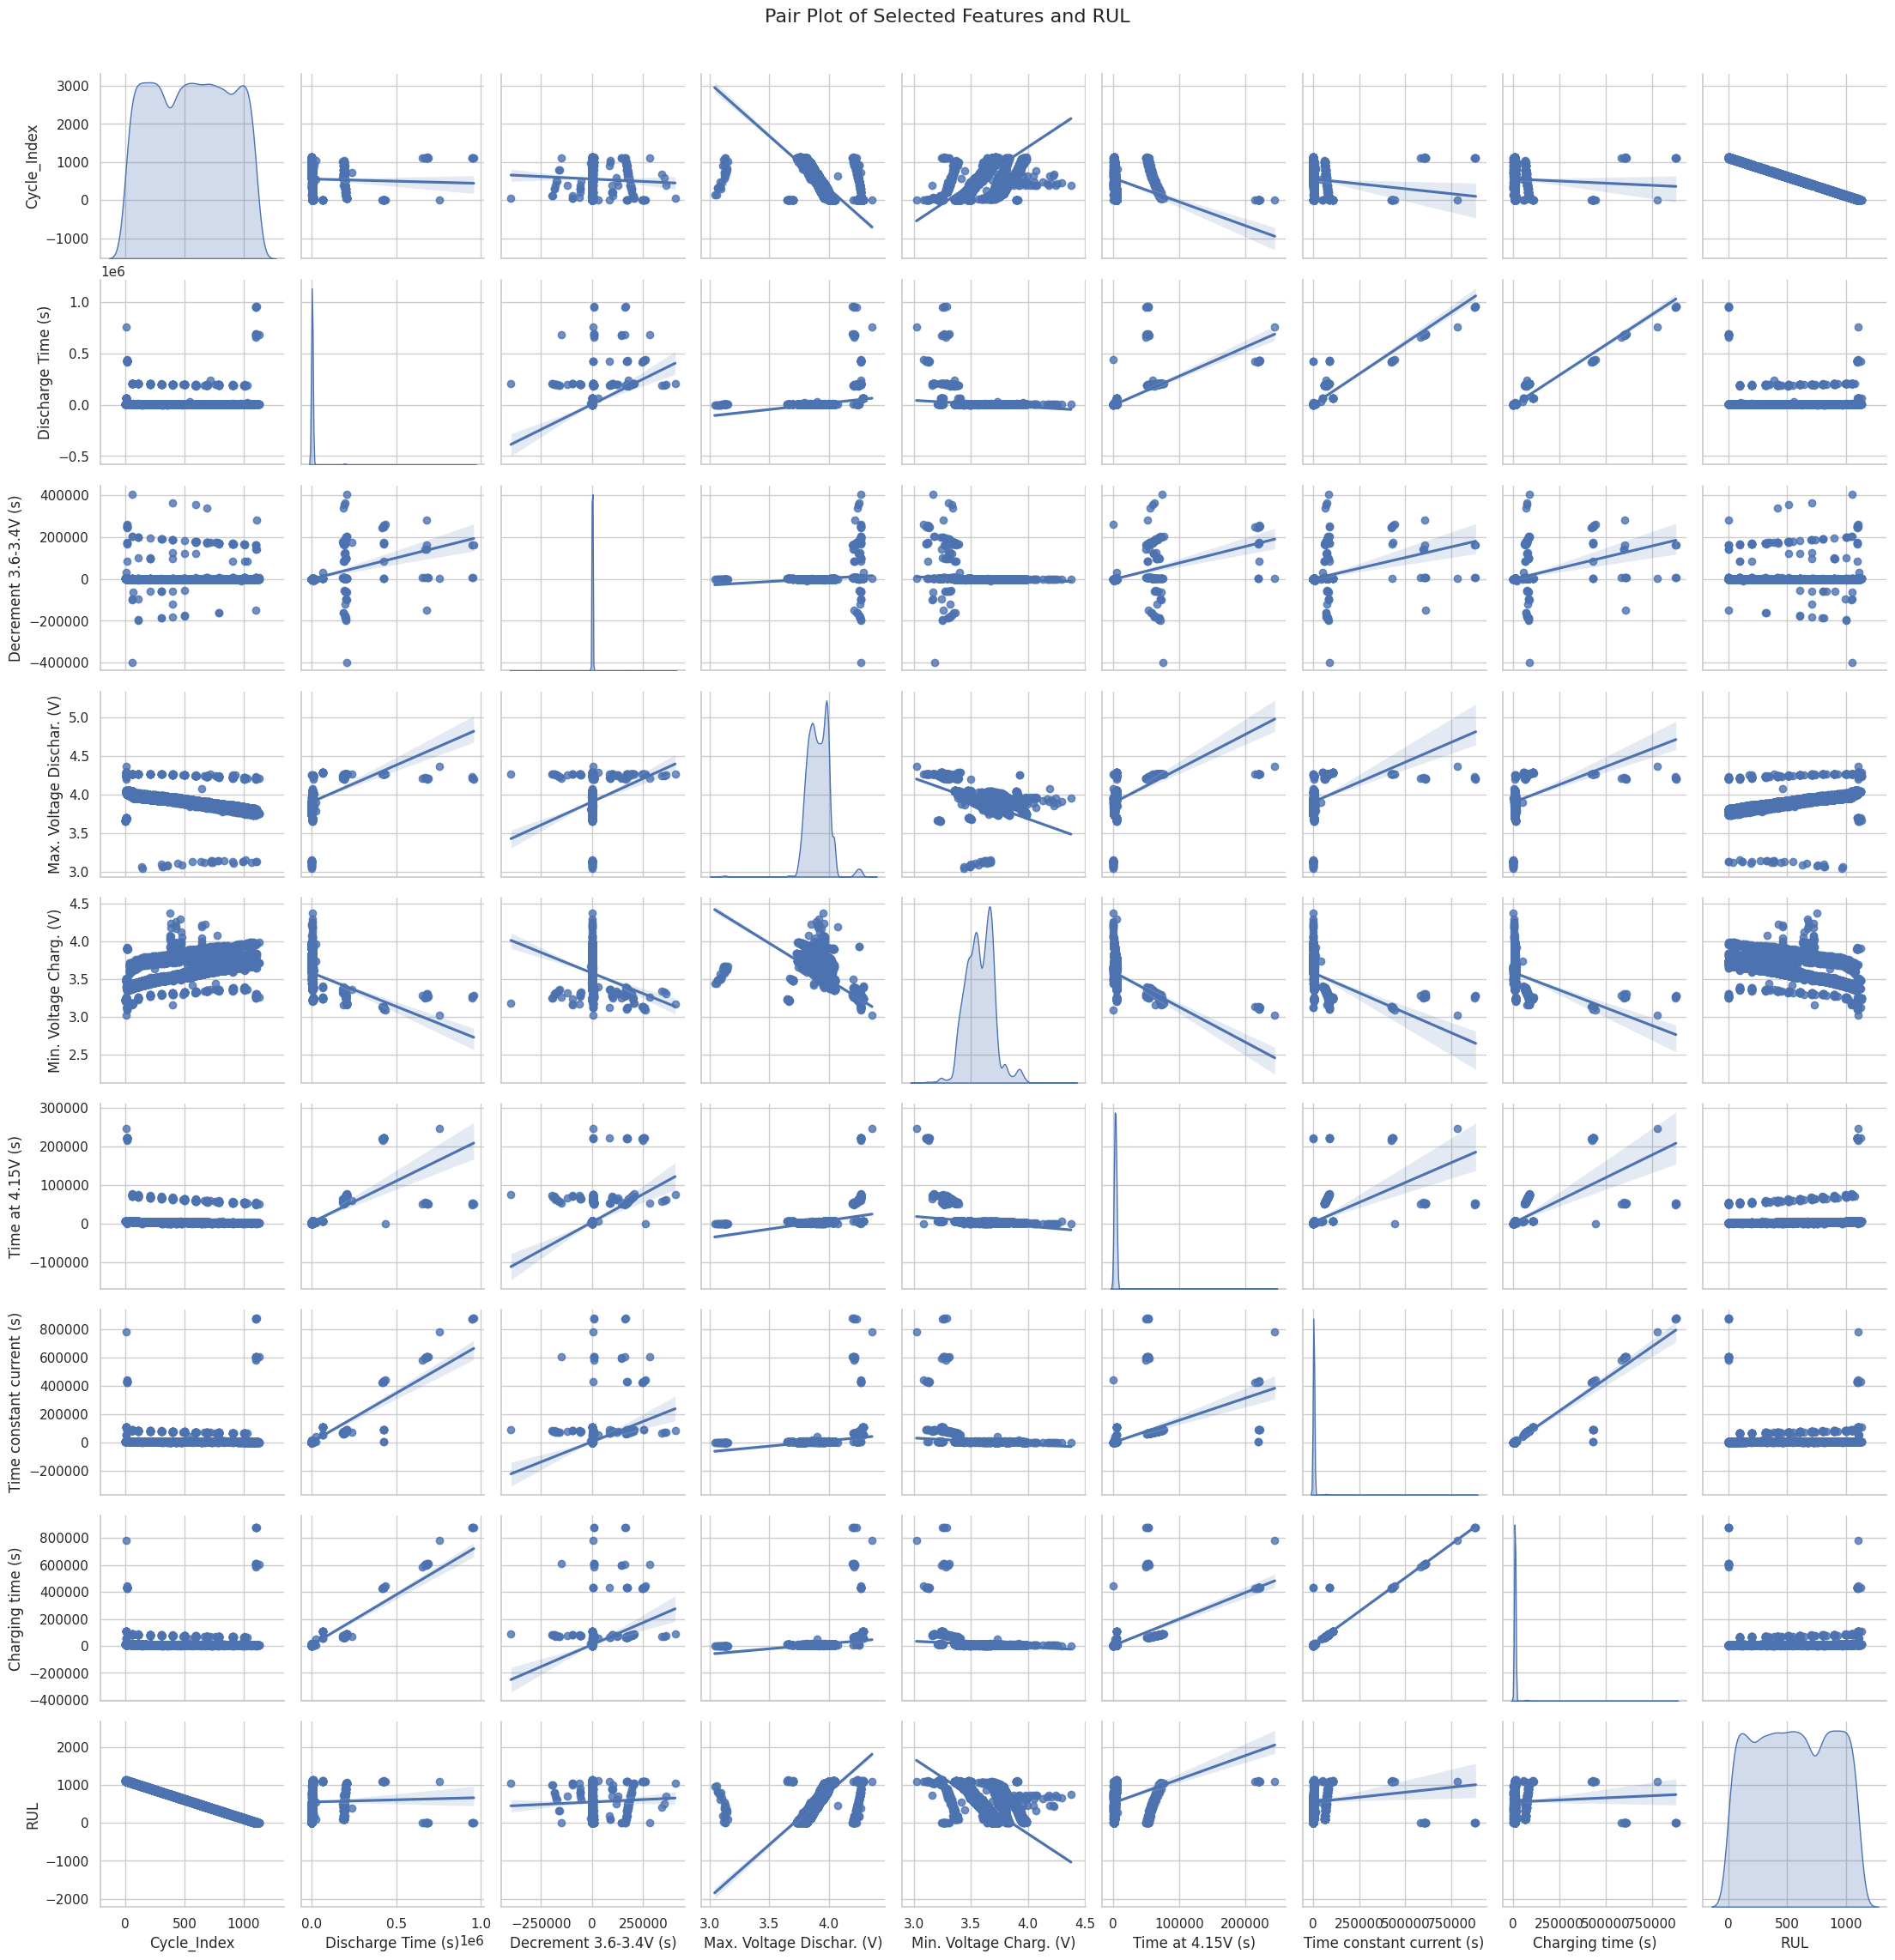

In [13]:
selected_columns = ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
                     'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
                     'Time at 4.15V (s)', 'Time constant current (s)',
                     'Charging time (s)', 'RUL']

sns.set_palette("viridis")
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[selected_columns], diag_kind='kde', kind='reg')


pair_plot.fig.suptitle("Pair Plot of Selected Features and RUL", y=1.02, fontsize=16)
plt.show()


> It is essential to exclude Cycle_Index as it represents the flip side of the coin when compared to RUL.

In [15]:
# drop Cycle_Index
df = df.drop(['Cycle_Index'], axis=1)
df.shape

(15064, 8)

# Data Splitting

In this section, we will separate the dataset into target and independan variables. Also, we will split it into training and testing dataset.

In [16]:
# Separating the target variable and features
target = df['RUL']
features = df.drop(['RUL'], axis=1)

# shapes of the target and features
target_shape, features_shape = target.shape, features.shape
target_shape, features_shape

((15064,), (15064, 7))

# Data Normalization using StandardScaler

In this section, we will normalize the features using the statndard normalization, where each number will be divided the by the 10 (x in power of 10)

In [23]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

features_std = pd.DataFrame(features_std, columns = features.columns)
features_std

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439
...,...,...,...,...,...,...,...
15059,-0.114982,-0.070500,-1.485449,1.326665,-0.311697,-0.160957,-0.128248
15060,-0.114961,-0.070500,-1.485449,1.342834,-0.312493,-0.160960,-0.128570
15061,-0.115022,-0.070511,-1.485449,1.326665,-0.312493,-0.160960,-0.129829
15062,-0.114878,-0.071641,-1.595339,2.110879,-0.353694,-0.171468,-0.091082


#### we will split the data into training and testing part

In [24]:
from sklearn.model_selection import (train_test_split, StratifiedKFold)

X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.2, random_state=2301)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 7), (3013, 7), (12051,), (3013,))

# Different Models with different accuracy

In this section, we will train model with different machine learning algorithm and check which one we will achieve better model

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

# Define a function to prepare the model
def prepare_model(algorithm, X_train, y_train):
    model = Pipeline(steps=[('preprocessing', preprocessing_pipeline), ('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

# List of regression algorithms
algorithms = [
    RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
    BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(),
    LinearRegression(), SGDRegressor(), KNeighborsRegressor()
]

# Lists to store results
names = []
times = []
mse = []
rmse = []



for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)

    # Measure training time
    start_time = time.time()

    # Prepare and train the model
    model = prepare_model(algorithm, X_train, y_train)

    # Predict and measure time
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)

    # Evaluate performance
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# Display regression results in a DataFrame
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
results_df = pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=True)
print('Regression Results in Algorithms:\n', results_df)


Regression Results in Algorithms:
                    Algorithm           MSE        RMSE       Time
3           BaggingRegressor    476.199697   21.822000   0.706323
0      RandomForestRegressor    534.762011   23.124922   9.154930
6         ExtraTreeRegressor    864.652174   29.404969   0.032986
9        KNeighborsRegressor    984.294245   31.373464   0.077098
5      DecisionTreeRegressor   1346.658563   36.696847   0.105931
2  GradientBoostingRegressor   1959.342841   44.264465   2.850385
1          AdaBoostRegressor   4184.432324   64.687188   1.642950
4                        SVR  10637.882904  103.140113  11.987031
7           LinearRegression  22060.500669  148.527777   0.034665
8               SGDRegressor  22678.643731  150.594302   0.033688


Best model is BaggingRegressor and RandomForestRegressor

In [27]:

best_model =  BaggingRegressor(random_state=2301, n_estimators=100)
best_model.fit(X_train, y_train)

# Display training and testing scores
print('Training Score:', best_model.score(X_train, y_train))
print('Testing Score:', best_model.score(X_test, y_test))

# Evaluate RMSE for the best model
best_model_pred = best_model.predict(X_test)
best_model_rmse = np.sqrt(mean_squared_error(y_test, best_model_pred))
print('Best Model RMSE:', best_model_rmse)


Training Score: 0.9992628277028843
Testing Score: 0.9944337817918263
Best Model RMSE: 23.703558749876244


<Axes: ylabel='RUL'>

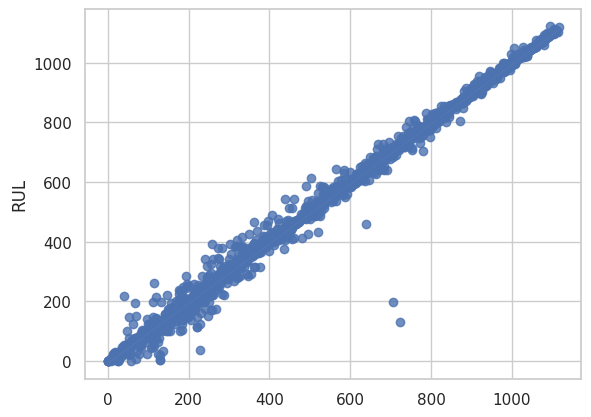

In [28]:
sns.regplot(x = best_model_pred, y = y_test)

# Which feature is important for model's accuracy?

In [31]:
# Check if the underlying base estimator is a tree-based model
if hasattr(best_model, 'base_estimator_') and hasattr(best_model.base_estimator_, 'feature_importances_'):
    feature_importances = best_model.base_estimator_.feature_importances_
    print('Feature Importances:', feature_importances)
else:
    print('Feature importances not available for the current model.')


Feature importances not available for the current model.


Let's check the our second best model, RandomForestRegressor

In [34]:

best_model =  RandomForestRegressor(random_state=2301, n_estimators=100)
best_model.fit(X_train, y_train)

# Display training and testing scores
print('Training Score:', best_model.score(X_train, y_train))
print('Testing Score:', best_model.score(X_test, y_test))

# Evaluate RMSE for the best model
best_model_pred = best_model.predict(X_test)
best_model_rmse = np.sqrt(mean_squared_error(y_test, best_model_pred))
print('Best Model RMSE:', best_model_rmse)


Training Score: 0.9992551589548171
Testing Score: 0.9946374885266009
Best Model RMSE: 23.26577679989827


Text(0.5, 0, 'Random Forest Feature Importance')

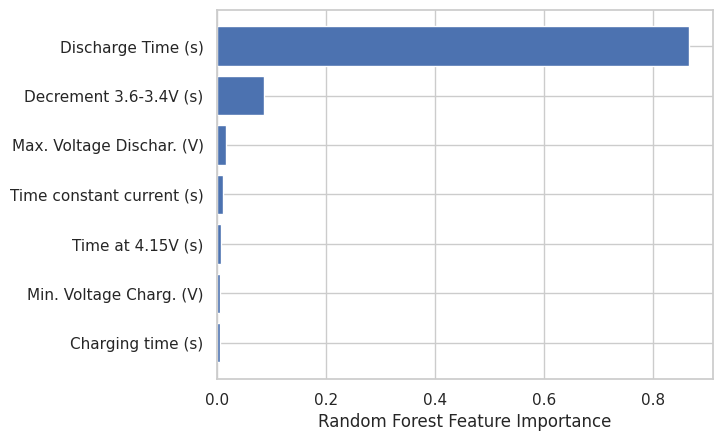

In [35]:
sorted_idx = best_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# BaggingRegressor

In [38]:
br = BaggingRegressor(random_state=2301)

br.fit(X_train, y_train)

training_score = br.score(X_train, y_train)
testing_score = br.score(X_test, y_test)

br_pred = br.predict(X_test)
br_rmse = np.sqrt(mean_squared_error(y_test, br_pred))

print('BaggingRegressor Results:')
print('Training Score:', training_score)
print('Testing Score:', testing_score)
print('RMSE:', br_rmse)

BaggingRegressor Results:
Training Score: 0.9988627924570438
Testing Score: 0.9942664055284801
RMSE: 24.057302357071208


# KNeighborsRegressor (KNN regressor)

In [43]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
knr.fit(X_train, y_train)

print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

knr_pred = knr.predict(X_test)
knr_rmse = np.sqrt(mean_squared_error(y_test, knr_pred))
print(knr_rmse)

0.9967541387755393
0.9908772551981837
30.345633146228298


# ExtraTreeRegressor

In [44]:
etr = ExtraTreeRegressor(random_state=2301)

etr.fit(X_train, y_train)
etr.fit(X_train, y_train)
print(etr.score(X_train, y_train))
print(etr.score(X_test, y_test))

etr_pred = etr.predict(X_test)
etr_rmse = np.sqrt(mean_squared_error(y_test, etr_pred))
print(etr_rmse)

0.9999999068777385
0.9905945507177002
30.812235824993532


# DecisionTreeRegressor

In [45]:
dtr = DecisionTreeRegressor(random_state=2301)
dtr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

dtr_pred = dtr.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
print(dtr_rmse)

0.9999999068777385
0.9885531782770145
33.99193594457182


# Sum of models

In [46]:
preds = 0.2*best_model_pred + 0.2*br_pred + 0.2*knr_pred + 0.2*etr_pred + 0.2*dtr_pred
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

21.881157434956727

<Axes: ylabel='RUL'>

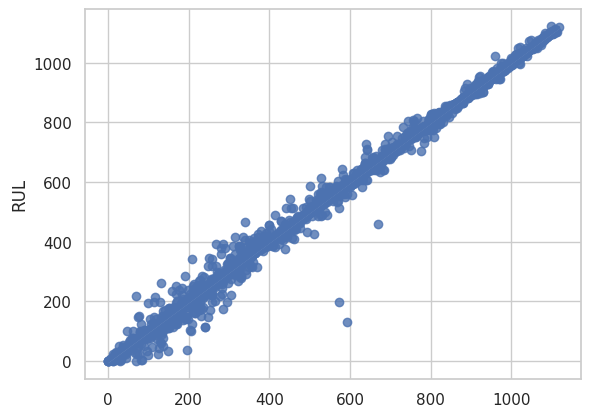

In [47]:
preds
sns.regplot(x = preds, y = y_test)

# Stacking All Models

In [52]:
from sklearn.model_selection import KFold

In [53]:

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=2301)

    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))

    print(f"{model.__class__.__name__} model start")

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print(f"\t Fold set: {folder_counter} start")

        X_tr, y_tr = X_train_n[train_index], y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)

        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values


# stacking for each model
rfr_train, rfr_test = get_stacking_base_datasets(best_model, X_train_n, y_train_n, X_test_n, 10)
br_train, br_test = get_stacking_base_datasets(br, X_train_n, y_train_n, X_test_n, 10)
knr_train, knr_test = get_stacking_base_datasets(knr, X_train_n, y_train_n, X_test_n, 10)
etr_train, etr_test = get_stacking_base_datasets(etr, X_train_n, y_train_n, X_test_n, 10)
dtr_train, dtr_test = get_stacking_base_datasets(dtr, X_train_n, y_train_n, X_test_n, 10)


RandomForestRegressor model start
	 Fold set: 0 start
	 Fold set: 1 start
	 Fold set: 2 start
	 Fold set: 3 start
	 Fold set: 4 start
	 Fold set: 5 start
	 Fold set: 6 start
	 Fold set: 7 start
	 Fold set: 8 start
	 Fold set: 9 start
BaggingRegressor model start
	 Fold set: 0 start
	 Fold set: 1 start
	 Fold set: 2 start
	 Fold set: 3 start
	 Fold set: 4 start
	 Fold set: 5 start
	 Fold set: 6 start
	 Fold set: 7 start
	 Fold set: 8 start
	 Fold set: 9 start
KNeighborsRegressor model start
	 Fold set: 0 start
	 Fold set: 1 start
	 Fold set: 2 start
	 Fold set: 3 start
	 Fold set: 4 start
	 Fold set: 5 start
	 Fold set: 6 start
	 Fold set: 7 start
	 Fold set: 8 start
	 Fold set: 9 start
ExtraTreeRegressor model start
	 Fold set: 0 start
	 Fold set: 1 start
	 Fold set: 2 start
	 Fold set: 3 start
	 Fold set: 4 start
	 Fold set: 5 start
	 Fold set: 6 start
	 Fold set: 7 start
	 Fold set: 8 start
	 Fold set: 9 start
DecisionTreeRegressor model start
	 Fold set: 0 start
	 Fold set: 1 start


In [54]:
# stacking
Stack_final_X_train = np.concatenate((rfr_train, br_train, knr_train, etr_train, dtr_train), axis=1)
Stack_final_X_test = np.concatenate((rfr_test, br_test, knr_test, etr_test, dtr_test), axis=1)

# final meta model
from sklearn.linear_model import Lasso
meta_model_lasso = Lasso(alpha=0.0005, random_state=2301)

# final stacking model
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
rmse = np.sqrt(mean_squared_error(y_test, final))

print('RMSE of the final stacking model:', rmse)

# 20.95674731614743

RMSE of the final stacking model: 20.95674731614743


In [62]:
preds


array([ 968.846,  269.446, 1035.518, ...,  721.936,  367.026,  575.65 ])

<Axes: ylabel='RUL'>

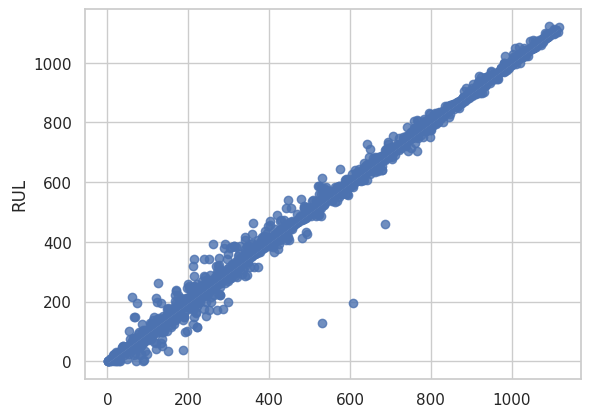

In [55]:
sns.regplot(x = final, y = y_test)